# How Do You Beat Stake Plinko

So I saw a couple videos of people [losing their minds and dollars over casino games](https://www.youtube.com/watch?v=2eNBfXb-A-Q) (warning: NSFW language/content). Now, I do know there's ways to exploit some gambling games. It got me wondering if there's one for one of these. Specifically, I want to know if there's a way to exploit the game Plinko (the one that looks like the picture)

![Plinko Game Lol](../../resources/plinko-picture.webp).

In [42]:
import numpy as np
import scipy as sci
import matplotlib
from matplotlib import pyplot as plt

# Config
matplotlib.rcdefaults()
np.set_printoptions(precision=2)

## How the Game Works

The game works like a Galton Board. Each puck/ball falls down a series of pegs into one of many buckets, each with a particular multiplier displayed. For each ball, you bet a certain amount for that ball. Whichever bucket that ball lands on, the money bet on that ball is multiplied by the multiplier. As can be seen in the image above, however, some of the multipliers are less than 1, meaning you will lose money if your ball lands in one of those buckets!

Given that it's a galton board, we can compute the probabilities for each slot using a binomial distribution of probabilities. For now, we'll label each bucket with an integer $r$ going left to right, with the leftmost being $r = 0$, and the total number of bins being $N + 1$. 

For each peg, we'll label $P(L)$ and $P(R)$ as the probability of a ball going left or right on that peg respectfully. The probability of a ball landing in bin $r$ will be written as $P(B = r)$ and can be given by the following:

$$
P(B = r) = {N \choose r} P(L)^{\left(N - r\right)} P(R)^r
$$

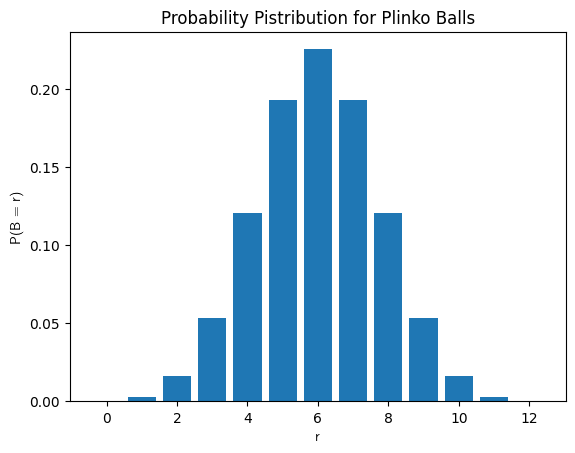

In [43]:
N = 12               # Total number of bins minus one
pL = pR = .5         # Assuming 50/50 chance of going left or right on any peg
r = np.arange(N + 1) # Indeces for each bin

# Compute final distribution
pB = sci.special.comb(N, r) * (pL ** (N - r)) * (pR ** r)

# Plot it
plt.bar(r, pB)
plt.title('Probability Pistribution for Plinko Balls')
plt.xlabel('r', usetex=True)
plt.ylabel('P(B = r)', usetex=True)
plt.show()

## Can we Win?

If we're extremely lucky, yes. We can bet all of our money on one ball and win big if it lands in one of the far ends with the high multipliers. However, unlike kick streamers, we have sanity and reasoning. We know this is highly unlikely and it gives us no control of the situation. The most likely scenario would be the ball would land on one of the middle multipliers and we'll lose some money (or all of it if we keep trying). Then we get upset and punch holes in our walls.

Realistically, we need to look at the result of many ball drops over time and determine how much we can win in the long run. Imagine, if you will, that we drop several balls, each with a little bit of our balance bet on it. With this strategy, the random chance events combined with the most common ones will over all average out to a singular, predictable outcome: the Expectation Value.

The expectation value is simply the sum of all of the multipliers weighted by their respective probabilities. If the Expectation value is less than 1, This means that, using the many balls strategy, we'll still lose money in the long run. So, it's not worth playing... ever (in fact the notebook would stop here).

Looking at the bins in the example image above, we can see the multipliers labeled for each. Using those we can compute the expectation value $E[M]$ for our multiplier $M$ based on the distribution we calculated.

$$
E[M] = \sum_r M_r P(B = r) = \sum_r M_r {N \choose r} P(L)^{\left(N - r\right)} P(R)^r
$$

In [44]:
# Using the multipliers I see in the image above
multipliers = np.array([ 33, 11, 4, 2, 1.1, .6, .3, .6, 1.1, 2, 4, 11, 33 ])

# Again, assuming 50/50 chances for every peg
pL = pR = 0.5

def expected_multiplier(multipliers):
    """
    Compute expected most likely multiplier given the
    array of multiplier bins
    """
    N = multipliers.shape[0] - 1
    r = np.arange(0, multipliers.shape[0])
    pM = sci.special.comb(N, r) * (pL ** (N - r)) * (pR ** r)
    return np.sum(multipliers * pM)

print('Expected Multiplier: {:0.2f}'.format(expected_multiplier(multipliers)))

Expected Multiplier: 0.99


And it looks like the multiplier is ever so slightly less than 1, and we can't really win.

However, if we actually look into the plinko game on Stake, there are other configurations (i.e. Risk levels) with different multipliers. Maybe one of them would provide better odds for us

In [45]:
low_risk = np.array([ 5.6, 2.1, 1.1, 1, .5, 1, 1.1, 2.1, 5.6 ])
medium_risk = np.array([ 33, 11, 4, 2, 1.1, .6, .3, .6, 1.1, 2, 4, 11, 33 ])
high_risk = np.array([ 110, 41, 10, 5, 3, 1.5, 1, 0.5, 0.3, 0.5, 1, 1.5, 3, 5, 10, 41, 110 ])

print('Low Risk Expectation: {:.2f}'.format(expected_multiplier(low_risk)))
print('Medium Risk Expectation: {:.2f}'.format(expected_multiplier(medium_risk)))
print('High Risk Expectation: {:.2f}'.format(expected_multiplier(high_risk)))

Low Risk Expectation: 0.99
Medium Risk Expectation: 0.99
High Risk Expectation: 0.99


As it turns out, the house indeed always wins. 

And so, how do you beat Plinko?

![That's the neat part. You don't!](../../resources/you-dont.jpeg).
This is why you don't gamble, kids.